In [ ]:
import sys
from PIL import Image

In [ ]:
class Node():
    def __init__(self, state, parent, action):
        self.state = state
        self.parent = parent
        self.action = action

In [ ]:
class StackFrontier():
    def __init__(self):
        self.frontier = []

    def add(self, node):
        self.frontier.append(node)

    def contains_state(self, state):
        return any(node.state == state for node in self.frontier)

    def empty(self):
        return len(self.frontier) == 0

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[-1]
            self.frontier = self.frontier[:-1]
            return node

In [ ]:
class QueueFrontier(StackFrontier):

    def remove(self):
        if self.empty():
            raise Exception("empty frontier")
        else:
            node = self.frontier[0]
            self.frontier = self.frontier[1:]
            return node

In [ ]:
class Maze():

    def __init__(self, filename):

        # Read file and set height and width of maze
        with open(filename) as f:
            contents = f.read()

        # Validate start and goal
        if contents.count("A") != 1:
            raise Exception("maze must have exactly one start point")
        if contents.count("B") != 1:
            raise Exception("maze must have exactly one goal")

        # Determine height and width of maze
        contents = contents.splitlines()
        self.height = len(contents)
        self.width = max(len(line) for line in contents)

        # Keep track of walls
        self.walls = []
        for i in range(self.height):
            row = []
            for j in range(self.width):
                try:
                    if contents[i][j] == "A":
                        self.start = (i, j)
                        row.append(False)
                    elif contents[i][j] == "B":
                        self.goal = (i, j)
                        row.append(False)
                    elif contents[i][j] == " ":
                        row.append(False)
                    else:
                        row.append(True)
                except IndexError:
                    row.append(False)
            self.walls.append(row)

        self.solution = None


    def print(self):
        solution = self.solution[1] if self.solution is not None else None
        print()
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):
                if col:
                    print("█", end="")
                elif (i, j) == self.start:
                    print("A", end="")
                elif (i, j) == self.goal:
                    print("B", end="")
                elif solution is not None and (i, j) in solution:
                    print("*", end="")
                else:
                    print(" ", end="")
            print()
        print()


    def neighbors(self, state):
        row, col = state
        candidates = [
            ("up", (row - 1, col)),
            ("down", (row + 1, col)),
            ("left", (row, col - 1)),
            ("right", (row, col + 1))
        ]

        result = []
        for action, (r, c) in candidates:
            if 0 <= r < self.height and 0 <= c < self.width and not self.walls[r][c]:
                result.append((action, (r, c)))
        return result


    def solve(self):
        """Finds a solution to maze, if one exists."""

        # Keep track of number of states explored
        self.num_explored = 0

        # Initialize frontier to just the starting position
        start = Node(state=self.start, parent=None, action=None)
        frontier = QueueFrontier()
        frontier.add(start)

        # Initialize an empty explored set
        self.explored = set()

        # Keep looping until solution found
        while True:

            # If nothing left in frontier, then no path
            if frontier.empty():
                raise Exception("no solution")

            # Choose a node from the frontier
            node = frontier.remove()
            self.num_explored += 1

            # If node is the goal, then we have a solution
            if node.state == self.goal:
                actions = []
                cells = []
                while node.parent is not None:
                    actions.append(node.action)
                    cells.append(node.state)
                    node = node.parent
                actions.reverse()
                cells.reverse()
                self.solution = (actions, cells)
                return

            # Mark node as explored
            self.explored.add(node.state)

            # Add neighbors to frontier
            for action, state in self.neighbors(node.state):
                if not frontier.contains_state(state) and state not in self.explored:
                    child = Node(state=state, parent=node, action=action)
                    frontier.add(child)


    def output_image(self, filename, show_solution=True, show_explored=False):
        from PIL import Image, ImageDraw
        cell_size = 50
        cell_border = 2

        # Create a blank canvas
        img = Image.new(
            "RGBA",
            (self.width * cell_size, self.height * cell_size),
            "black"
        )
        draw = ImageDraw.Draw(img)

        solution = self.solution[1] if self.solution is not None else None
        for i, row in enumerate(self.walls):
            for j, col in enumerate(row):

                # Walls
                if col:
                    fill = (40, 40, 40)

                # Start
                elif (i, j) == self.start:
                    fill = (255, 0, 0)

                # Goal
                elif (i, j) == self.goal:
                    fill = (0, 171, 28)

                # Solution
                elif solution is not None and show_solution and (i, j) in solution:
                    fill = (220, 235, 113)

                # Explored
                elif solution is not None and show_explored and (i, j) in self.explored:
                    fill = (212, 97, 85)

                # Empty cell
                else:
                    fill = (237, 240, 252)

                # Draw cell
                draw.rectangle(
                    ([(j * cell_size + cell_border, i * cell_size + cell_border),
                      ((j + 1) * cell_size - cell_border, (i + 1) * cell_size - cell_border)]),
                    fill=fill
                )

        img.save(filename)


In [ ]:
m = Maze('maze2.txt')
print("Maze:")
m.print()
print("Solving...")
m.solve()
print("States Explored:", m.num_explored)
print("Solution:")
m.print()
m.output_image("maze.png", show_explored=True)

Maze:

███                 █████████
█   ███████████████████   █ █
█ ████                █ █ █ █
█ ███████████████████ █ █ █ █
█                     █ █ █ █
█████████████████████ █ █ █ █
█   ██                █ █ █ █
█ █ ██ ███ ██ █████████ █ █ █
█ █    █   ██B█         █ █ █
█ █ ██ ████████████████ █ █ █
███ ██             ████ █ █ █
███ ██████████████ ██ █ █ █ █
███             ██    █ █ █ █
██████ ████████ ███████ █ █ █
██████ ████             █   █
A      ██████████████████████

Solving...
States Explored: 77
Solution:

███                 █████████
█   ███████████████████   █ █
█ ████                █ █ █ █
█ ███████████████████ █ █ █ █
█                     █ █ █ █
█████████████████████ █ █ █ █
█   ██********        █ █ █ █
█ █ ██*███ ██*█████████ █ █ █
█ █****█   ██B█         █ █ █
█ █*██ ████████████████ █ █ █
███*██             ████ █ █ █
███*██████████████ ██ █ █ █ █
███****         ██    █ █ █ █
██████*████████ ███████ █ █ █
██████*████             █   █
A******█████████████

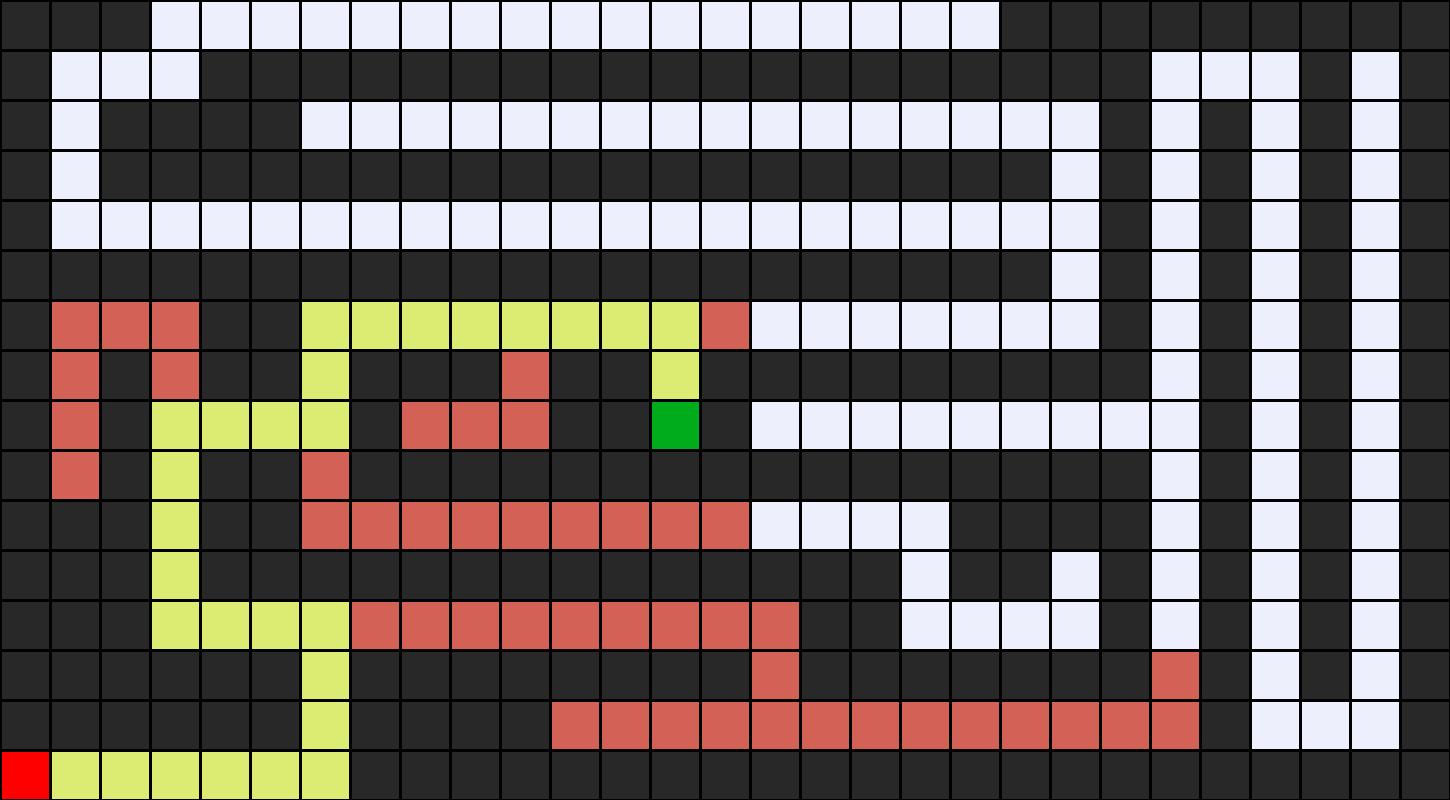

In [ ]:
# Red shows the paths that have been traversed, while yellow shows the real path from the start state (or dark red) to the goal (or green).
Image.open('maze.png')